In [42]:
"""
Passo a passo:
1) Carregar a imagem desejada (em escala de cinza)
2) Normalizar a imagem (histograma / min-max)
3) Discretização a imagem no range [0-9]
4) Aplicar pixel a pixel o mapping de halftone (conforme figura em anexo) 
5) Salvar a imagem e verificar a qualidade 
6) Compare os resultados obtidos utilizando a imagem original e sua versão com normalização
"""

'\nPasso a passo:\n1) Carregar a imagem desejada (em escala de cinza)\n2) Normalizar a imagem (histograma / min-max)\n3) Discretização a imagem no range [0-9]\n4) Aplicar pixel a pixel o mapping de halftone (conforme figura em anexo) \n5) Salvar a imagem e verificar a qualidade \n6) Compare os resultados obtidos utilizando a imagem original e sua versão com normalização\n'

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


<h1>Functions</h1>

In [44]:
#getMappingArray2D: Receives a level of color (0-9) an return the mapping (3x3 array) correspondent to given level

def getMappingArray2D(colorLevel):
    """
    
    Receives a level of color (int between 0-9) an return the mapping (3x3 np array) correspondent to given level
    """
    
    if colorLevel == 0:
        mappingArray = np.array(
            [[0, 0, 0],
            [0, 0, 0], 
            [0, 0, 0]]) #valores pretos ou círculos pretos?
        
        mappingArray = np.array(mappingArray)
        return mappingArray
       
    elif colorLevel == 1:
        mappingArray = [[0, 255, 0],
                        [0, 0, 0], 
                        [0, 0, 0]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
                                                
    elif colorLevel == 2:
        mappingArray = [[0, 255, 0],
                        [0, 0, 0], 
                        [0, 0, 255]] 
                
        mappingArray = np.array(mappingArray)
        return mappingArray
        
    elif colorLevel == 3:
        mappingArray = [[255, 255, 0],
                        [0, 0, 0], 
                        [0, 0, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
   
    elif colorLevel == 4:
        mappingArray = [[255, 255, 0],
                        [0, 0, 0], 
                        [255, 0, 255]] 

                
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 5:
        mappingArray = [[255, 255, 255],
                        [0, 0, 0], 
                        [255, 0, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray

    elif colorLevel == 6:
        mappingArray = [[255, 255, 255],
                        [0, 0, 255], 
                        [255, 0, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 7:
        mappingArray = [[255, 255, 255],
                        [0, 0, 255], 
                        [255, 255, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 8:
        mappingArray = [[255, 255, 255],
                        [255, 0, 255], 
                        [255, 255, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray
    
    elif colorLevel == 9:
        mappingArray = [[255, 255, 255],
                        [255, 255, 255], 
                        [255, 255, 255]] 
        
        mappingArray = np.array(mappingArray)
        return mappingArray


In [45]:
def detonaHalf(img_array_dis):
    """
    Recebe a img(matrix 2d) em grayscale, já normalizada e discretizada no range 0-9
    Retorna a img em halftone
    
    """
    
    original_array = img_dis #testagem real
    
    #Flattening array
    original_array_flat = original_array.flatten() 
    original_array_flat
    
    #Preparing to create big_array (result image)
    num_elements_big = original_array.size #how many elements
    num_elements_big

    EXPANSION_FACTOR = 3 #the new image will be 3 times bigger
    EXPANSION_FACTOR

    num_rows_big = original_array.shape[0] * EXPANSION_FACTOR #how many rows
    num_rows_big

    num_cols_big = original_array.shape[1] * EXPANSION_FACTOR #how many cols
    num_cols_big

    #Creating big array with specified dimensions (num_rows*3,num_cols*3)
    big_array = np.zeros((num_rows_big, num_cols_big), dtype=int) #MUDOU AQUI

    
    for i in range(num_elements_big): #MUDOU AQUI
        #get spatial indexes (x,y) from flattened index i
        x,y=np.unravel_index(i, original_array.shape) 
        #put the correspondent mapping according value of original matrix
        #look at the indexation in big_array 3*x means displacements of 3
        big_array[3*x:3*x+3,3*y:3*y+3] = getMappingArray2D(original_array_flat[i])
    
    return big_array

In [46]:
def normalize(img):
    """
        Recebe uma imagem em grayscale, equaliza por histograma
        
    """
    img_eq = cv2.equalizeHist(img)
    return img_eq

In [47]:
def discretize09(img):
    """
        Recebe uma imagem e discretiza no range 0-9 (com tipo de dado int)
    """
    f = img
    g = (f - f.min()) / (f.max()-f.min()) * 9
    g #image in range 0-9
    
    #converted and rounded to int to avoid floating values
    img_dis = g.astype(int) 
    return img_dis    

In [48]:
def showHistogram(img):
    plt.hist(img.ravel(),256,[0,256]); plt.show()

In [49]:
def showImageGray(img):
    plt.imshow(img, cmap="gray")

<h1>ALGORITHM: Halftone</h1>

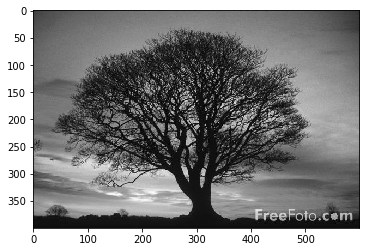

In [56]:
""" #1) Carregar a imagem desejada (em escala de cinza) """

img = cv2.imread("../img/tree.jpg", 0)

showImageGray(img)

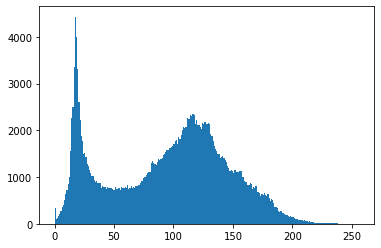

In [58]:
showHistogram(img)

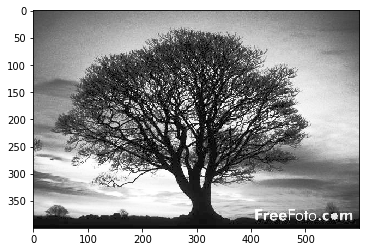

In [76]:
""" #2) Normalizar a imagem (histograma / min-max) """

img_norm = normalize(img)

showImageGray(img_norm)

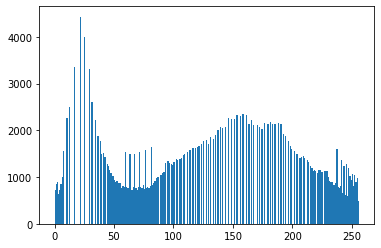

In [77]:
showHistogram(img_norm)

In [117]:
""" #3) Discretização a imagem no range [0-9] """

img_dis = discretize09(img_norm)
img_dis

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [118]:
""" #4) Aplicar pixel a pixel o mapping de halftone """
img_half = detonaHalf(img_dis)
img_half

array([[  0, 255,   0, ...,   0, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

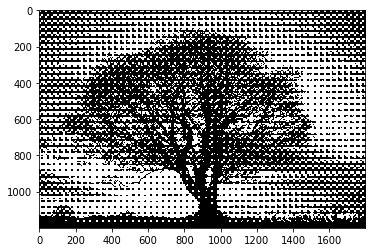

In [119]:
showImageGray(img_half)

<h1>end</h1>

<H1>DÚVIDA AQUI: RESOLVIDA!</H1>

In [69]:
"""Fazendo um exemplo menor com uma imagem de entrada 2x2.
já fiz um exemmplo com 1x1, que é o caso mais fácil"""

#get original image
original_array = np.ones((2,2),dtype=int)
original_array

array([[1, 1],
       [1, 1]])

In [70]:
#original_array = img_dis #testagem real

In [71]:
#Flattening array
original_array_flat = original_array.flatten() 
original_array_flat

array([1, 1, 1, 1])

In [97]:

#Flattening array
original_array_flat = original_array.flatten() 
original_array_flat

#Preparing to create big_array (result image)
num_elements_big = original_array.size #how many elements

EXPANSION_FACTOR = 3 #the new image will be 3 times bigger

num_rows_big = original_array.shape[0] * EXPANSION_FACTOR #how many rows

num_cols_big = original_array.shape[1] * EXPANSION_FACTOR #how many cols

#Creating big array with specified dimensions (num_rows*3,num_cols*3)
big_array = np.zeros((num_rows_big, num_cols_big), dtype=int) #MUDOU AQUI: ok!


for i in range(num_elements_big): #MUDOU AQUI
    
    #get spatial indexes (x,y) from flattened index i
    x,y=np.unravel_index(i, original_array.shape) 
    #put the correspondent mapping according value of original matrix
    print(x,y)
    
    #look at the indexation in big_array 3*x means displacements of 3
    #each execution of this code below returns an 3x3 array
    big_array[3*x:3*x+3,3*y:3*y+3] = getMappingArray2D(original_array_flat[i])
#print(big_array)

0 0
0 1
1 0
1 1


In [98]:
#pegando linhas x (à nível de linha: linhas 0 a 3)
print(big_array[0]) #linha 0 (especificado aqui em x) com colunas 0 1 2 (especificado em y, não aqui)
print(big_array[1]) #linha 1 com colunas 0 1 2
print(big_array[2]) #linha 2 com colunas 0 1 2

#mesmo que isso

print("\n\n", big_array[0:3]) #linha 0 com colunas 0 1 2

[  0 255   0   0 255   0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]


 [[  0 255   0   0 255   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


In [102]:
#Pegando colunas y (à nível de coluna: colunas 0 a 3)
print(big_array[0:3,0:3 ])

[[  0 255   0]
 [  0   0   0]
 [  0   0   0]]


In [ ]:
#Pegando colunas y (à nível de coluna: colunas 0 a 3)
print(big_array[0:3,0:3 ])

In [74]:
big_array.shape

(6, 6)

In [73]:
#cada elemento é um array 3x3:
big_array[0]

array([  0, 255,   0,   0, 255,   0])

In [364]:
#a ideia seria dar um reshape pra ficar como na imagem anexo. Um array 2x2 onde cada elemento seria uma matrix 3x3
big_array

array([[[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]]])

In [365]:
img_end = np.reshape(big_array,(num_rows_big, num_cols_big), order='C')
img_end #ESSE 255 DA DIREITA DEVIA ESTAR EM CIMA

array([[  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0]])

In [ ]:
#esse problema causa problema para exibir a imagem

<H1>Trash code: Código apenas com testes anteriores. Apenas por registro</H1>

In [ ]:
"""TENTATIVAS SEM ÊXITO"""

In [251]:
#Testing

big_array.shape

(4, 3, 3)

In [302]:
big_array

array([[[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0]]])

In [253]:
img_end = big_array.reshape(1, num_rows_big, num_cols_big)
img_end

array([[[  0, 255,   0,   0,   0,   0],
        [  0,   0,   0,   0, 255,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0, 255,   0,   0,   0,   0],
        [  0,   0,   0,   0, 255,   0],
        [  0,   0,   0,   0,   0,   0]]])

In [254]:
img_end.shape

(1, 6, 6)

In [255]:
img_end = img_end.reshape(num_rows_big,num_cols_big)
img_end

array([[  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0]])

In [256]:
img_end.shape

(6, 6)

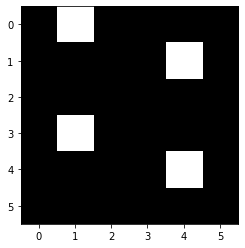

In [257]:
plt.imshow(img_end, cmap="gray")

In [180]:
ravel_img = ravel_img.reshape(1, 36)
ravel_img

array([[  0, 255,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0]])

In [181]:
ravel_img.shape

(1, 36)

In [187]:
ravel_img = ravel_img.reshape(6,6)

In [190]:
ravel_img.shape

(6, 6)

In [191]:
ravel_img

array([[  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0],
       [  0,   0,   0,   0,   0,   0]])

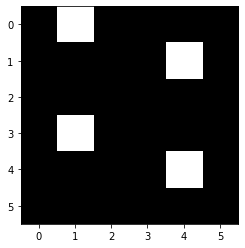

In [228]:
plt.imshow(ravel_img, cmap="gray")

In [56]:
#what ravel do?

array = np.array([22, 41, 37])
array

array([22, 41, 37])

In [60]:
array.shape

(3,)

In [61]:
np.unravel_index(array, (7,6))

(array([3, 6, 6]), array([4, 5, 1]))

In [62]:
np.unravel_index([31, 41, 13], (7,6), order='F')

(array([3, 6, 6]), array([4, 5, 1]))

In [63]:
np.unravel_index(6, (3, 4))

(1, 2)